<a href="https://colab.research.google.com/github/KOdunga/AIMLCourse/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x:'%.3f' %x) # only show 3 decimal places for floats

In [ ]:
data = pd.read_csv('/content/Melbourne_Housing.csv')
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,03-09-2016,13.500,3042.000,3.000,2.000,1.000,303.000,225,2016.000,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,03-09-2016,3.300,3206.000,2.000,1.000,0.000,120.000,82,1900.000,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,03-09-2016,3.300,3206.000,2.000,1.000,0.000,159.000,inf,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,03-09-2016,6.400,3078.000,3.000,2.000,4.000,853.000,263,1930.000,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,03-09-2016,6.400,3078.000,3.000,2.000,2.000,208.000,inf,2013.000,Northern Metropolitan,2211,1110000


In [ ]:
data.tail()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
27109,Noble Park,3,h,C21,30-09-2017,22.700,3174.000,3.000,1.000,6.000,569.000,130,1959.000,South-Eastern Metropolitan,11806,627500
27110,Reservoir,3,u,RW,30-09-2017,12.000,3073.000,3.000,1.000,1.000,NaN,105,1990.000,Northern Metropolitan,21650,475000
27111,Roxburgh Park,4,h,Raine,30-09-2017,20.600,3064.000,4.000,2.000,2.000,NaN,225,1995.000,Northern Metropolitan,5833,591000
27112,Springvale South,3,h,Harcourts,30-09-2017,22.200,3172.000,3.000,2.000,1.000,544.000,NaN,NaN,South-Eastern Metropolitan,4054,780500
27113,Westmeadows,4,h,Barry,30-09-2017,16.500,3049.000,4.000,2.000,6.000,813.000,140,1960.000,Northern Metropolitan,2474,791000


In [ ]:
data.shape

(27114, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10543 non-null  object 
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 3.3+ MB


In [ ]:
#convert date from object to date-time format
data['Date'] = pd.to_datetime(data['Date'])

<ipython-input-16-e6260a6a2c4a>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10543 non-null  object        
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

In [ ]:
#check why building area is string instead of float or int
data['BuildingArea'].unique()

array(['225', '82', 'inf', '263', '242', '251', '117', 'missing', '76',
       '399', '118', '103', '180', '123', '218', '129', '167', '154',
       '275', '121', nan, '125', '255', '75', '156', '240', '268', '108',
       '69', '140', '214', '253', '189', '215', '96', '104', '100', '313',
       '144', '93', '110', '70', '122', '51', '147', '113', '83', '56',
       '137', '85', '64', '175', '3558', '170', '265', '353', '138', '19',
       '116', '87', '74', '320', '300', '210', '120', '86', '97', '200',
       '106', '14', '161', '128', '185', '146', '133', '115', '143',
       '150', '195', '236', '276', '188', '179', '249', '141', '34', '73',
       '107', '84', '81', '207', '50', '264', '312', '235', '221', '183',
       '132', '160', '186', '78', '105', '145', '62', '220', '315', '181',
       '61', '112', '420', '226', '266', '410', '449', '356', '477',
       '250', '95', '190', '284', '247', '213', '209', '119', '111',
       '130', '348', '166', '44', '176', '98', '159', '79'

In [ ]:
#Replace missing and infinite values with nan, not a number
data['BuildingArea'] = data['BuildingArea'].replace(['missing', 'inf'], np.nan)

In [ ]:
#force the data type to be float
data['BuildingArea'] = data['BuildingArea'].astype(float)

In [ ]:
data['BuildingArea'].unique()

array([ 225.    ,   82.    ,       nan,  263.    ,  242.    ,  251.    ,
        117.    ,   76.    ,  399.    ,  118.    ,  103.    ,  180.    ,
        123.    ,  218.    ,  129.    ,  167.    ,  154.    ,  275.    ,
        121.    ,  125.    ,  255.    ,   75.    ,  156.    ,  240.    ,
        268.    ,  108.    ,   69.    ,  140.    ,  214.    ,  253.    ,
        189.    ,  215.    ,   96.    ,  104.    ,  100.    ,  313.    ,
        144.    ,   93.    ,  110.    ,   70.    ,  122.    ,   51.    ,
        147.    ,  113.    ,   83.    ,   56.    ,  137.    ,   85.    ,
         64.    ,  175.    , 3558.    ,  170.    ,  265.    ,  353.    ,
        138.    ,   19.    ,  116.    ,   87.    ,   74.    ,  320.    ,
        300.    ,  210.    ,  120.    ,   86.    ,   97.    ,  200.    ,
        106.    ,   14.    ,  161.    ,  128.    ,  185.    ,  146.    ,
        133.    ,  115.    ,  143.    ,  150.    ,  195.    ,  236.    ,
        276.    ,  188.    ,  179.    ,  249.    , 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

In [ ]:
data.isnull().sum()

Suburb               0
Rooms                0
Type                 0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           6436
Bathroom          6442
Car               6817
Landsize          9241
BuildingArea     16585
YearBuilt        15129
Regionname           0
Propertycount        0
Price                0
dtype: int64

In [ ]:
data.duplicated().sum()

11

## Univariate Analysis

In [45]:
#Show all houses whose landsize is greater than 60000
data.loc[data['Landsize']>60000]


,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
23897,Silvan,3,h,Harcourts,2017-05-27,34.600,3795.000,3.000,2.000,2.000,76000.000,NaN,NaN,Eastern Victoria,457,1085000
25079,Balwyn North,3,h,Kay,2016-08-28,9.200,3104.000,3.000,1.000,2.000,75100.000,NaN,NaN,Southern Metropolitan,7809,2000000


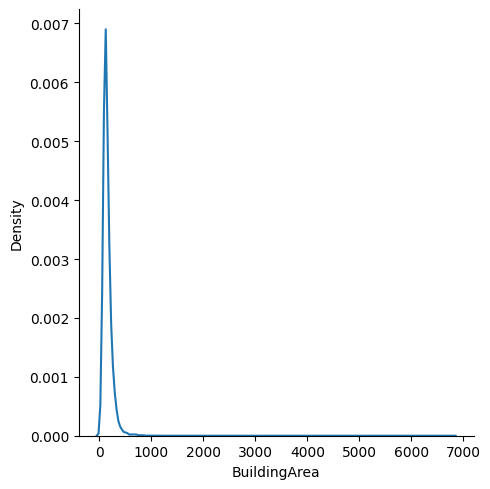

In [46]:
sns.displot(data= data, x = 'BuildingArea', kind = 'kde');

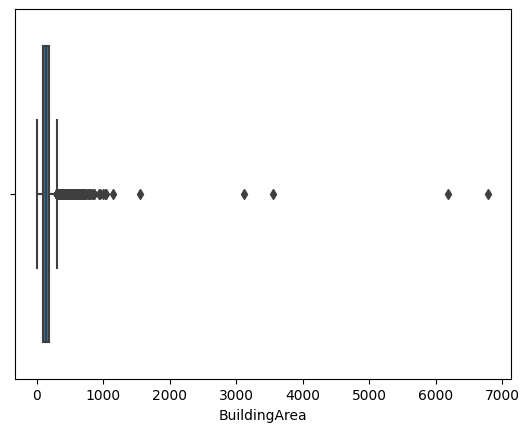

In [47]:
sns.boxplot(data = data, x = 'BuildingArea');

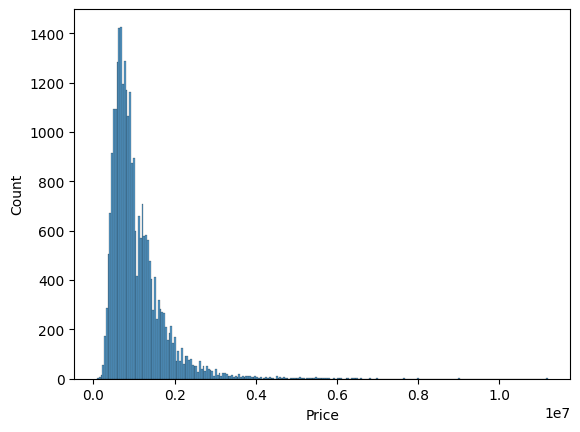

In [49]:
sns.histplot(data = data, x = 'Price');

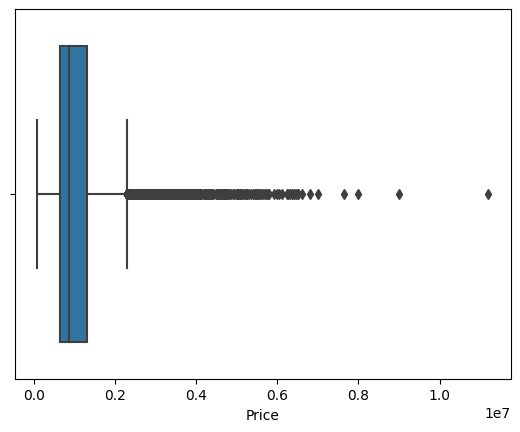

In [50]:
sns.boxplot(data = data, x = 'Price');

In [55]:
data.loc[data['Rooms']>7].shape[0]

23

In [56]:
data.loc[data['Rooms']>7,'Type'].value_counts()

h    21
u     2
Name: Type, dtype: int64

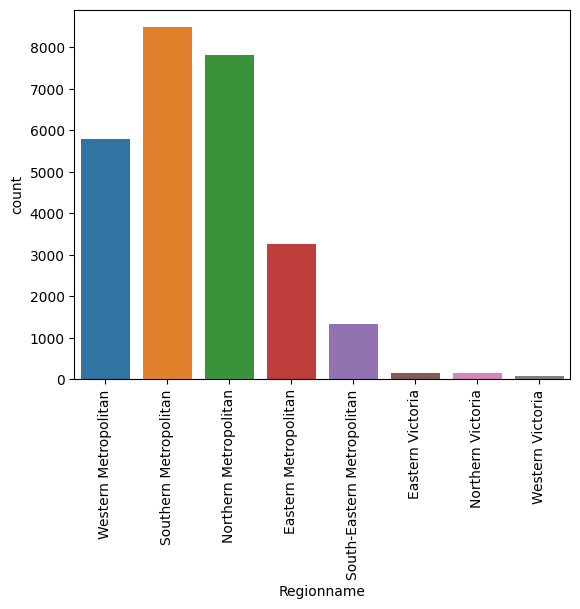

In [57]:
sns.countplot(data = data, x = 'Regionname')
plt.xticks(rotation = 90);

#Bivariate Analysis

<ipython-input-61-accb254364ad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot= True, cmap = 'Spectral', vmin = -1, vmax=1);


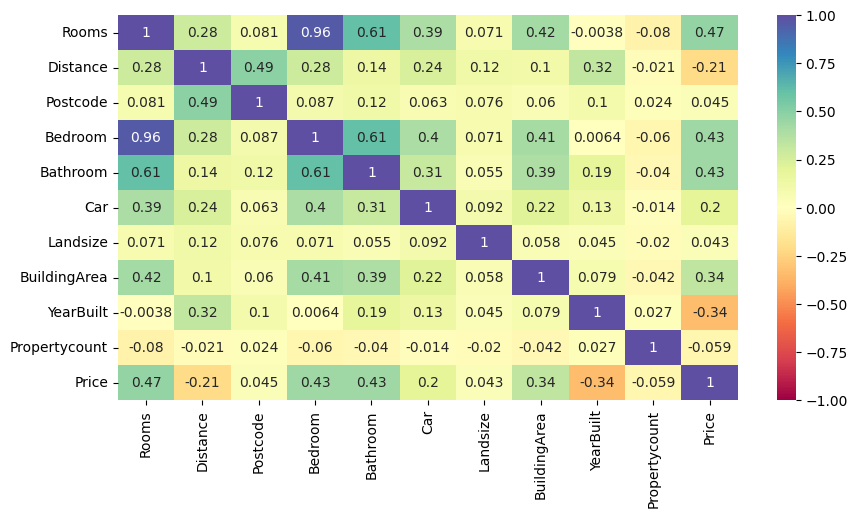

In [61]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot= True, cmap = 'Spectral', vmin = -1, vmax=1);

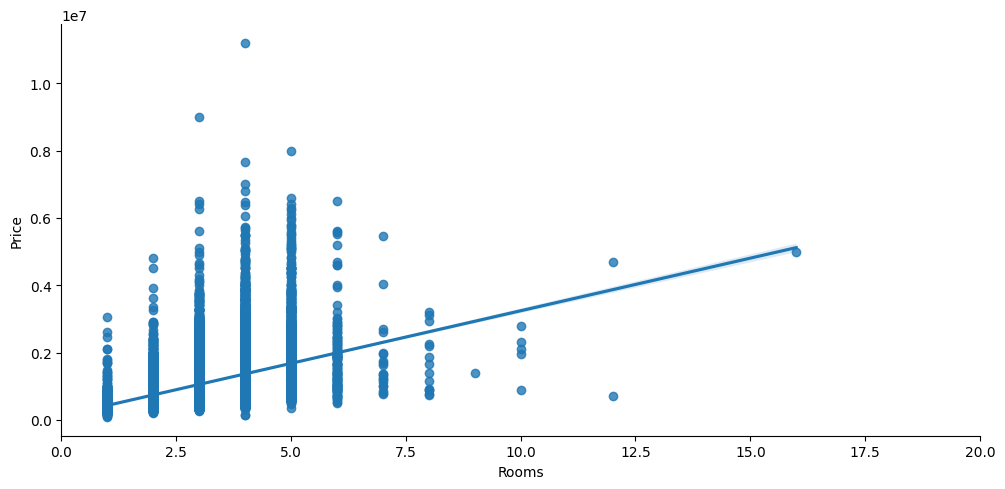

In [64]:
sns.lmplot(data = data, x = 'Rooms', y = 'Price', height = 5, aspect = 2)
plt.xlim(0,20);

In [65]:
data[['Rooms','Price']].corr()

,Rooms,Price
Rooms,1.000,0.465
Price,0.465,1.000


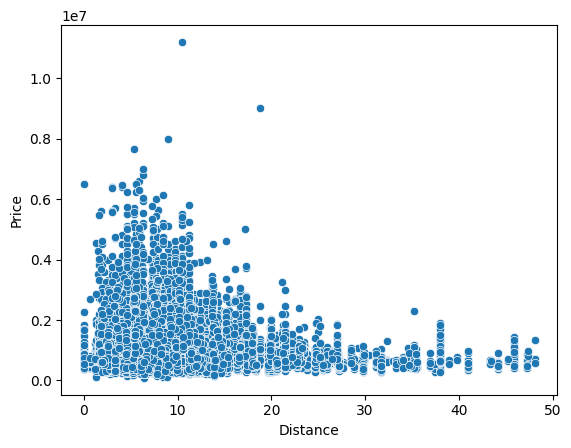

In [66]:
sns.scatterplot(data= data, x = 'Distance', y = 'Price');

<ipython-input-68-0255f8b7b1a4>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = data, x = 'Distance', y = 'Price', ci = None);


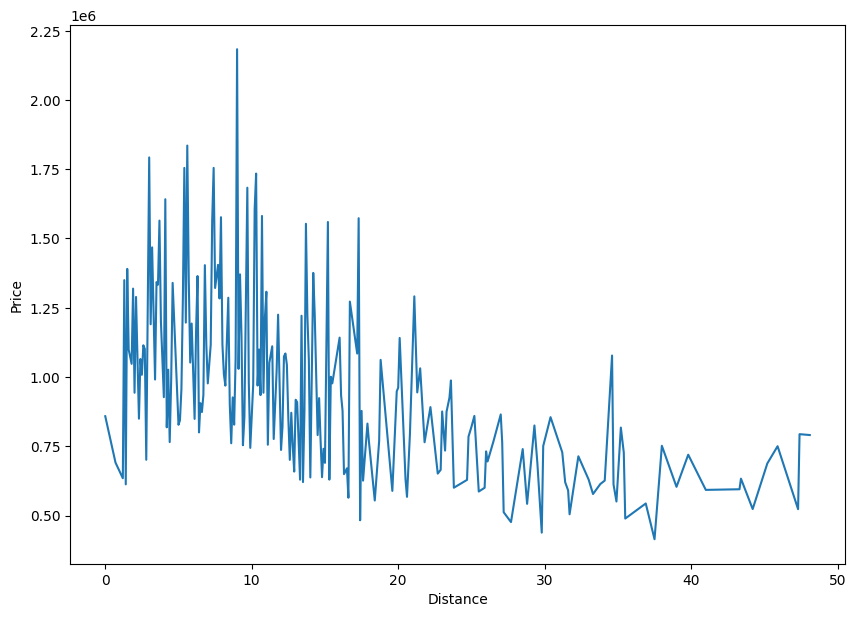

In [68]:
plt.figure(figsize = (10,7))
sns.lineplot(data = data, x = 'Distance', y = 'Price', ci = None);

In [69]:
#Using pd.cut() function to create bins for distance

data['Distance_bins'] = pd.cut(data['Distance'], bins = [0,15,30,50], labels = ['Nearby','Moderately Close','Far'], right = False)

In [72]:
data.sample(10)

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Distance_bins
6947,Coburg North,3,h,Barry,2017-09-12,6.700,3058.000,3.000,1.000,4.000,NaN,NaN,NaN,Northern Metropolitan,3445,952000,Nearby
8309,Canterbury,4,h,Kay,2017-12-08,8.400,3126.000,4.000,2.000,2.000,650.000,275.000,2006.000,Southern Metropolitan,3265,2725000,Nearby
1291,Kew,3,h,Jellis,2016-07-05,5.600,3101.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,10331,1800000,Nearby
12552,Northcote,2,h,Nelson,2016-04-16,5.500,3070.000,2.000,1.000,1.000,354.000,97.000,1920.000,Northern Metropolitan,11364,1020000,Nearby
8776,Balwyn North,4,h,Fletchers,2018-03-03,9.700,3104.000,4.000,2.000,2.000,576.000,331.000,2013.000,Southern Metropolitan,7809,2255000,Nearby
17172,Ascot Vale,2,u,Jellis,2016-11-19,5.900,3032.000,2.000,2.000,1.000,50.000,NaN,NaN,Western Metropolitan,6567,540000,Nearby
18072,Hampton East,4,t,Buxton,2017-10-21,13.800,3188.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,2356,1115000,Nearby
11271,Clayton,7,h,Ray,2017-10-14,16.700,3168.000,7.000,2.000,2.000,615.000,NaN,NaN,South-Eastern Metropolitan,5837,1215000,Moderately Close
22253,Essendon North,1,u,Nelson,2017-11-25,8.200,3041.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,1308,238000,Nearby
12846,Altona North,3,h,Village,2017-09-16,9.400,3025.000,3.000,1.000,1.000,NaN,NaN,NaN,Western Metropolitan,5132,745000,Nearby


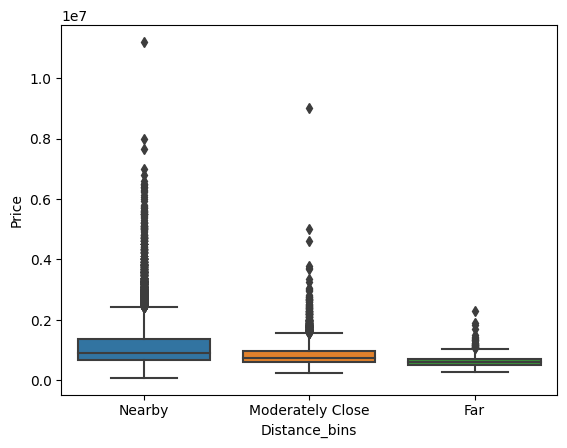

In [70]:
sns.boxplot(data =data, x = 'Distance_bins', y = 'Price');

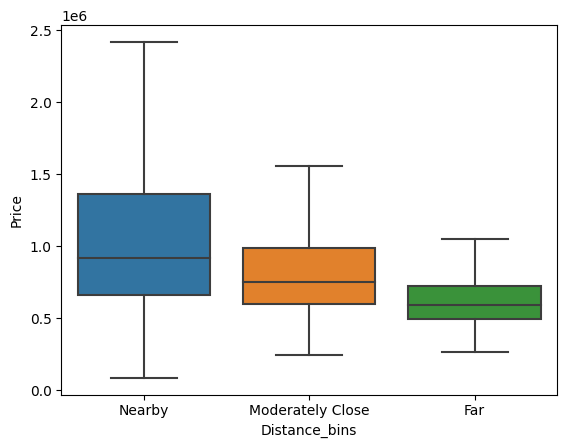

In [74]:
sns.boxplot(data =data, x = 'Distance_bins', y = 'Price', showfliers = False); # showfliers parameter hides the display of outliers

In [75]:
year_at_sale = data['Date'].dt.year
year_at_sale

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
27098    2017
27099    2017
27100    2017
27101    2017
27102    2017
Name: Date, Length: 27103, dtype: int64

In [76]:
np.max(year_at_sale)

2018

In [77]:
data['Ageofprop'] = year_at_sale - data['YearBuilt']
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Distance_bins,Ageofprop
0,Airport West,3,t,Nelson,2016-03-09,13.500,3042.000,3.000,2.000,1.000,303.000,225.000,2016.000,Western Metropolitan,3464,840000,Nearby,0.000
1,Albert Park,2,h,hockingstuart,2016-03-09,3.300,3206.000,2.000,1.000,0.000,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000,Nearby,116.000
2,Albert Park,2,h,Thomson,2016-03-09,3.300,3206.000,2.000,1.000,0.000,159.000,NaN,NaN,Southern Metropolitan,3280,1455000,Nearby,NaN
3,Alphington,4,h,Brace,2016-03-09,6.400,3078.000,3.000,2.000,4.000,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000,Nearby,86.000
4,Alphington,3,h,Jellis,2016-03-09,6.400,3078.000,3.000,2.000,2.000,208.000,NaN,2013.000,Northern Metropolitan,2211,1110000,Nearby,3.000


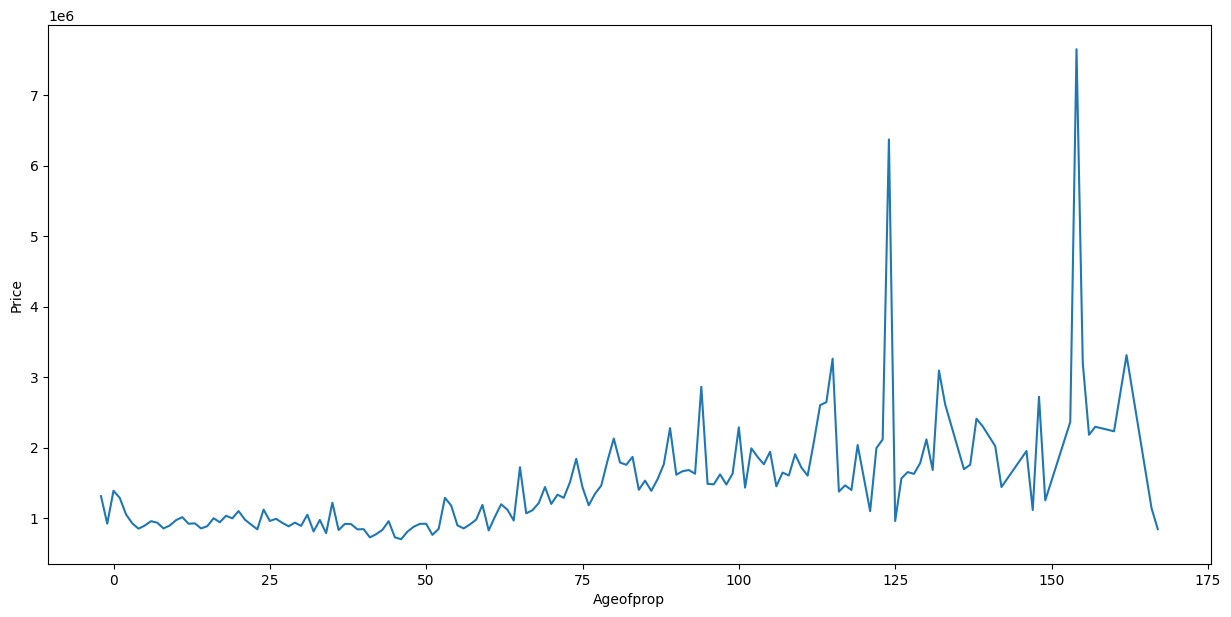

In [81]:
plt.figure(figsize = (15,7))
sns.lineplot(data = data, x = 'Ageofprop',y = 'Price', errorbar = None);

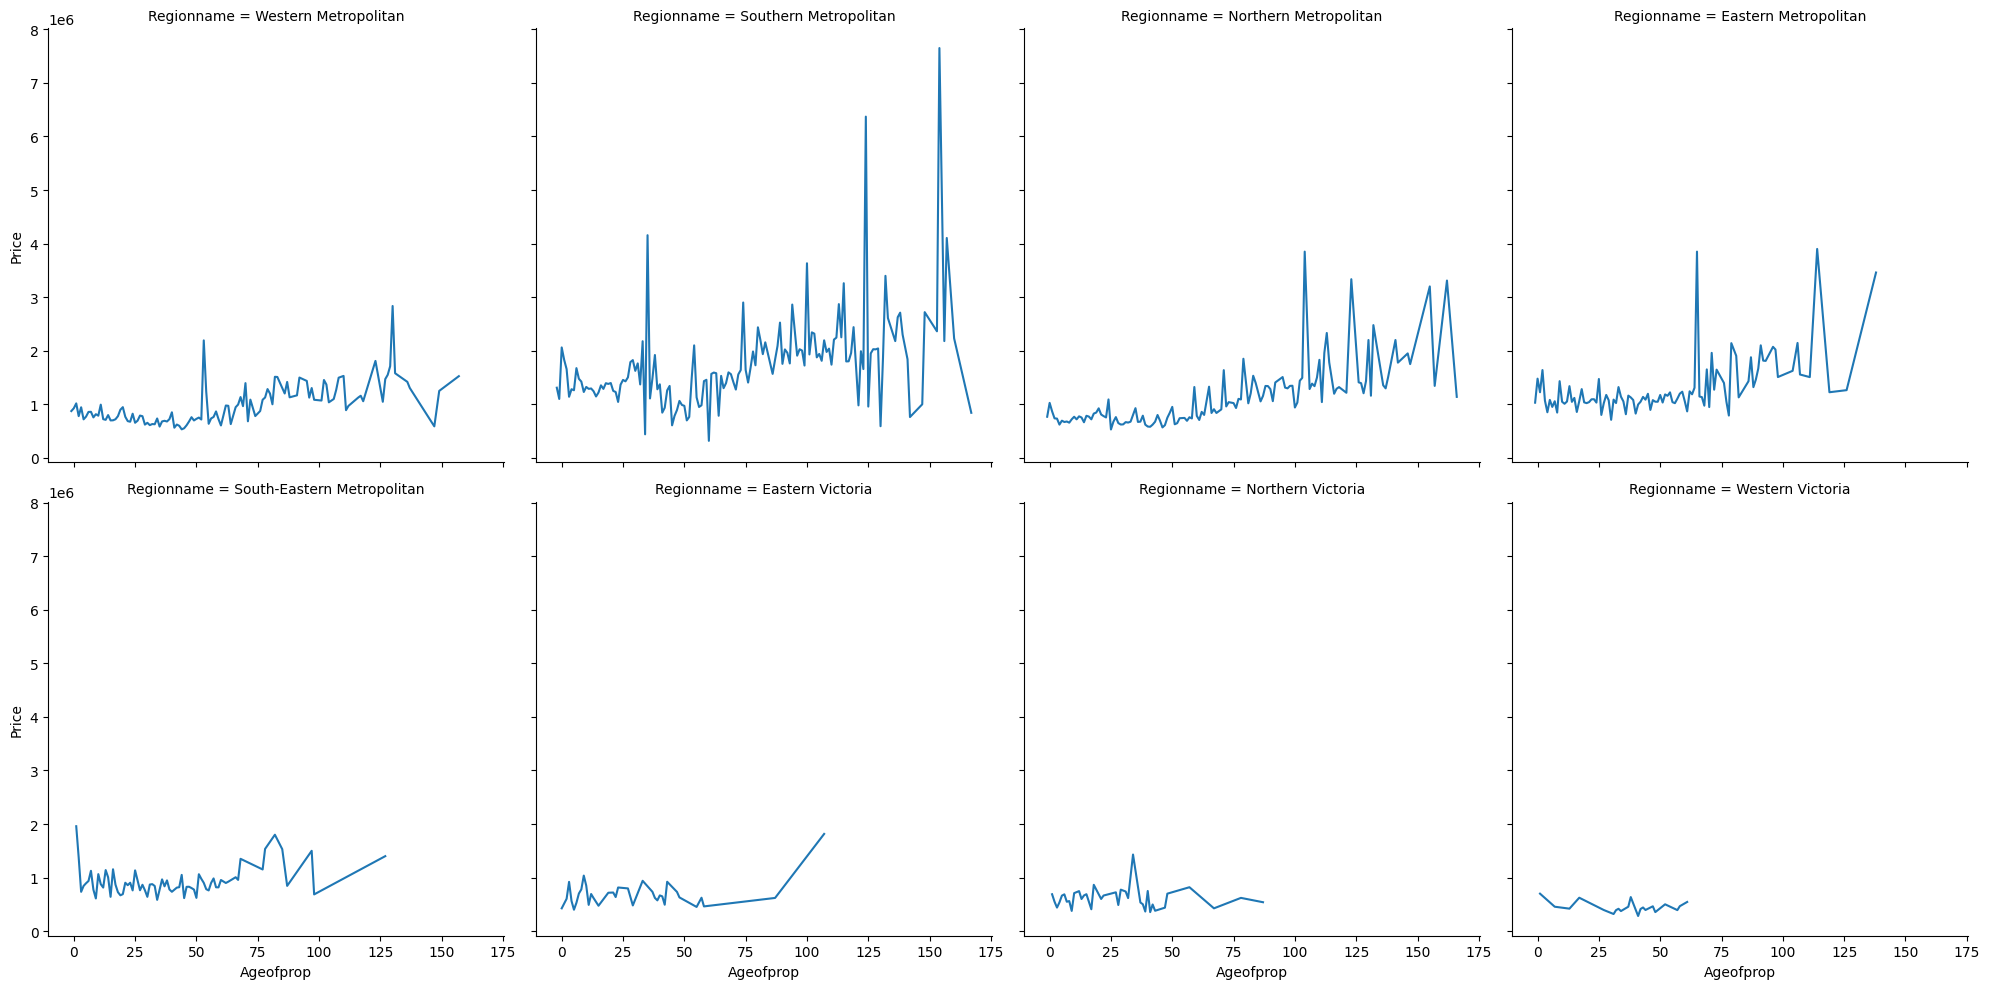

In [84]:
#relplot() funtcion lets you plot multiple plots on a single axis
sns.relplot(data = data, x = 'Ageofprop', col = 'Regionname',y = 'Price', kind = 'line',errorbar = None, col_wrap =4 );

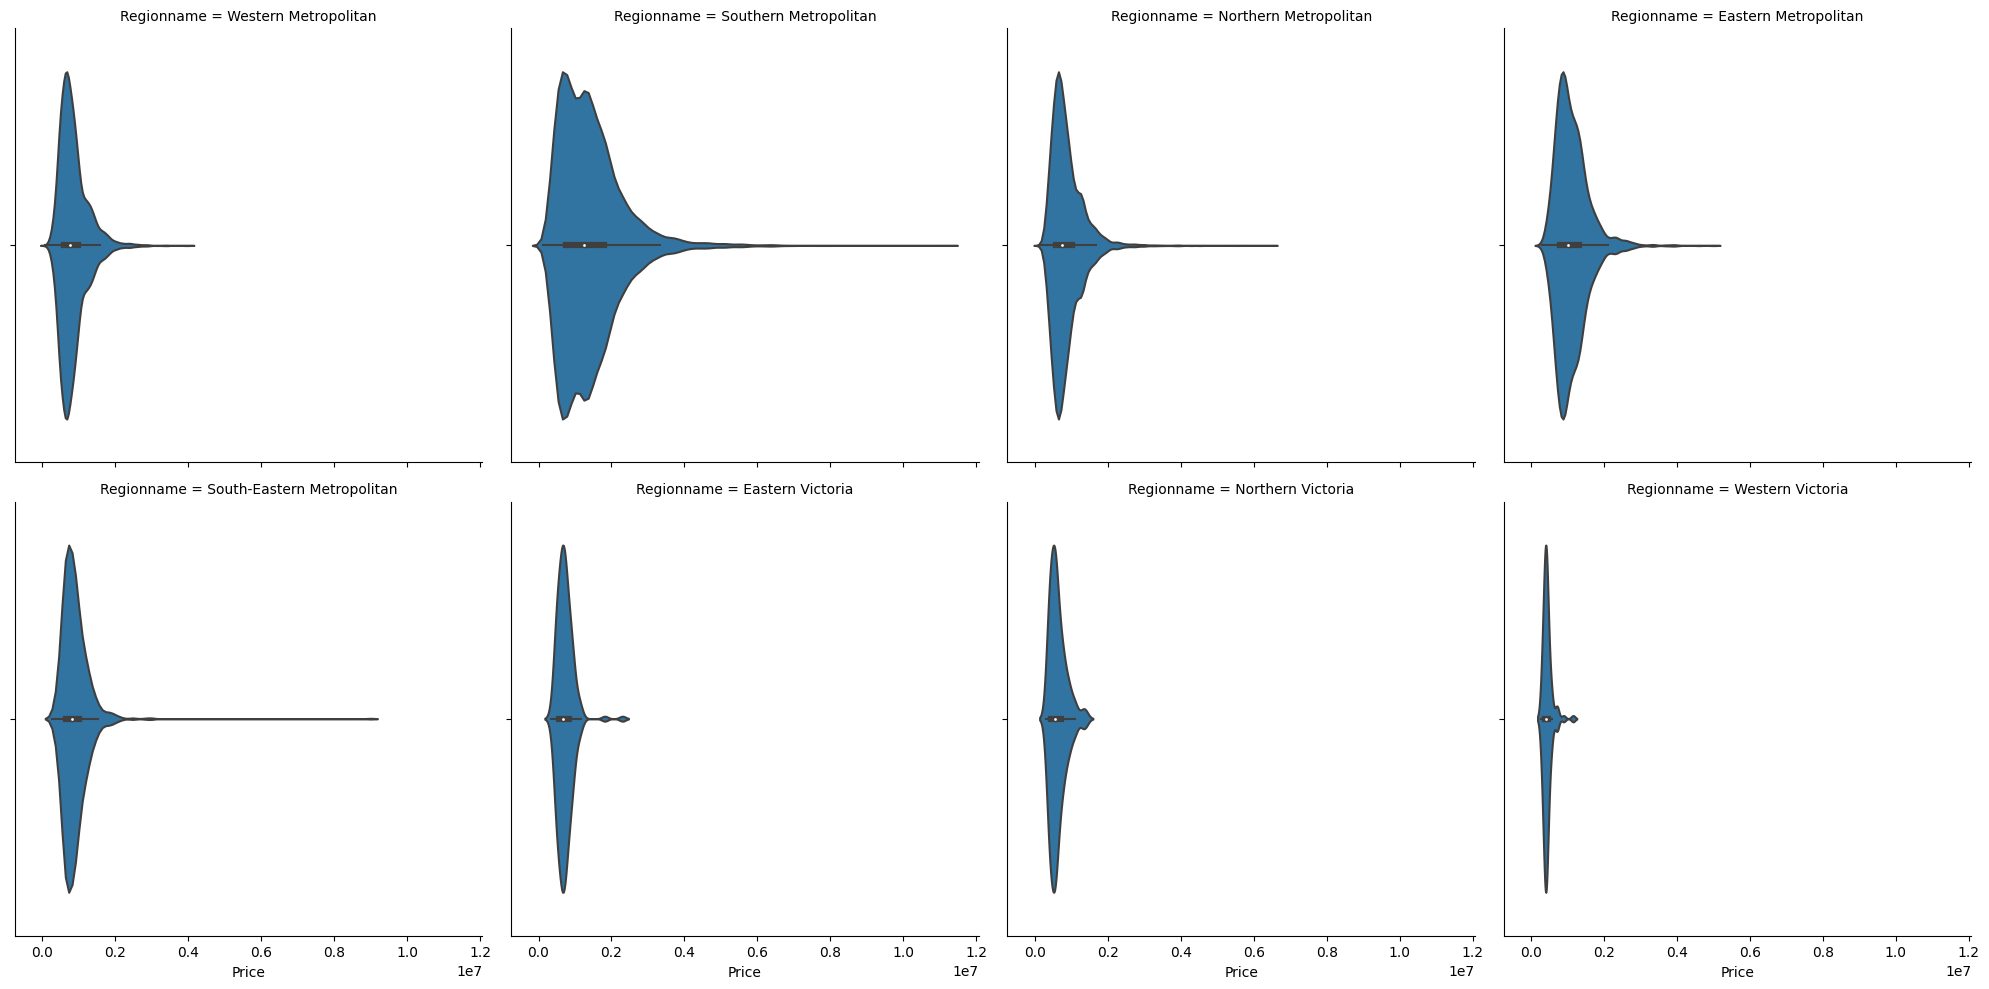

In [85]:
sns.catplot(x = 'Price',
            col = 'Regionname',
            data = data,
            col_wrap = 4,
            kind = 'violin');

##Missing Value Treatment

In [86]:
data.isnull().sum()

Suburb               0
Rooms                0
Type                 0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           6425
Bathroom          6431
Car               6806
Landsize          9230
BuildingArea     16574
YearBuilt        15118
Regionname           0
Propertycount        0
Price                0
Distance_bins        1
Ageofprop        15118
dtype: int64

In [89]:
data.loc[data['Distance'].isnull()==True]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Distance_bins,Ageofprop
9590,Fawkner Lot,3,h,Brad,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN,NaN


In [91]:
data.loc[data['Suburb']=='Fawkner Lot']

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Distance_bins,Ageofprop
9590,Fawkner Lot,3,h,Brad,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN,NaN


In [92]:
data = data.drop(9590).reset_index(drop = True)

In [93]:
data.isnull().sum()

Suburb               0
Rooms                0
Type                 0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom           6424
Bathroom          6430
Car               6805
Landsize          9229
BuildingArea     16573
YearBuilt        15117
Regionname           0
Propertycount        0
Price                0
Distance_bins        0
Ageofprop        15117
dtype: int64

In [94]:
data.loc[data['Bedroom'].isnull()==True]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Distance_bins,Ageofprop
8,Altona North,4,h,hockingstuart,2016-03-09,11.100,3025.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,5132,857500,Nearby,NaN
12,Ashburton,2,h,Marshall,2016-03-09,11.000,3147.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,3052,1820000,Nearby,NaN
14,Avondale Heights,4,h,Jellis,2016-03-09,10.500,3034.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,4502,1310000,Nearby,NaN
25,Balwyn North,4,u,hockingstuart,2016-03-09,9.200,3104.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1450000,Nearby,NaN
26,Balwyn North,2,h,Fletchers,2016-03-09,9.200,3104.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1305000,Nearby,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,Footscray,2,u,McGrath,2017-09-30,5.100,3011.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,7570,455500,Nearby,NaN
27089,Forest Hill,2,h,Fletchers,2017-09-30,15.400,3131.000,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,4385,762000,Moderately Close,NaN
27090,Glen Waverley,3,u,Ray,2017-09-30,16.700,3150.000,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,15321,1100000,Moderately Close,NaN
27093,Kingsbury,2,t,RW,2017-09-30,12.100,3083.000,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,1414,512000,Nearby,NaN


In [95]:
data.loc[data['Bedroom'].isnull()==True, 'YearBuilt'].value_counts(dropna=False)

NaN    6424
Name: YearBuilt, dtype: int64

In [96]:
data.loc[data['Bedroom'].isnull()==True, 'Car'].value_counts(dropna=False)

NaN    6424
Name: Car, dtype: int64

In [98]:
data.groupby(['Regionname','Type'])[['Bedroom','Bathroom','Car']].mean()

Bedroom  Bathroom   Car
Regionname                 Type                         
Eastern Metropolitan       h       3.552     1.807 1.946
                           t       3.032     1.853 1.673
                           u       2.357     1.263 1.290
Eastern Victoria           h       3.560     1.881 2.098
                           u       2.667     1.000 1.333
Northern Metropolitan      h       3.106     1.468 1.685
                           t       2.567     1.620 1.362
                           u       1.878     1.160 1.093
Northern Victoria          h       3.496     1.892 2.146
                           u       3.000     2.000 2.000
South-Eastern Metropolitan h       3.476     1.713 2.094
                           t       2.887     1.849 1.679
                           u       2.260     1.205 1.342
Southern Metropolitan      h       3.383     1.840 1.883
                           t       3.024     2.012 1.780
                           u       1.939     1.191 1.135
Western Metropolitan       h       3.244     1.576 1.907
                           t       2.880     1.851 1.538
                           u       2.106     1.192 1.144
Western Victoria           h       3.379     1.448 2.060

In [99]:
#Using the transform() function to fill in every row of the dataframe using fillna() function
data['Bedroom'] = data['Bedroom'].fillna(value = data.groupby(['Regionname','Type'])['Bedroom'].transform('mean'))

In [100]:
#Using the transform() function to fill in every row of the dataframe using fillna() function
data['Bathroom'] = data['Bathroom'].fillna(value = data.groupby(['Regionname','Type'])['Bathroom'].transform('mean'))

In [101]:
#Using the transform() function to fill in every row of the dataframe using fillna() function
data['Car'] = data['Car'].fillna(value = data.groupby(['Regionname','Type'])['Car'].transform('mean'))

In [102]:
data.isnull().sum()

Suburb               0
Rooms                0
Type                 0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom              0
Bathroom             0
Car                  0
Landsize          9229
BuildingArea     16573
YearBuilt        15117
Regionname           0
Propertycount        0
Price                0
Distance_bins        0
Ageofprop        15117
dtype: int64

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27102 entries, 0 to 27101
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27102 non-null  object        
 1   Rooms          27102 non-null  int64         
 2   Type           27102 non-null  object        
 3   SellerG        27102 non-null  object        
 4   Date           27102 non-null  datetime64[ns]
 5   Distance       27102 non-null  float64       
 6   Postcode       27102 non-null  float64       
 7   Bedroom        27102 non-null  float64       
 8   Bathroom       27102 non-null  float64       
 9   Car            27102 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27102 non-null  object        
 14  Propertycount  27102 non-null  int64         
 15  Price          2710

In [104]:
#Convert imputed values to integers from fractions. use astype to round down
data['Bedroom'] = data['Bedroom'].astype(int)
data['Bathroom'] = data['Bathroom'].astype(int)
data['Car'] = data['Car'].astype(int)


In [106]:
#For landsize, we can use median because it is highly skewed data
data.groupby(['Regionname', 'Type'])[['Landsize']].median()

Landsize
Regionname                 Type          
Eastern Metropolitan       h      693.500
                           t      236.000
                           u      208.000
Eastern Victoria           h      840.000
                           u      230.000
Northern Metropolitan      h      482.000
                           t      145.000
                           u       50.000
Northern Victoria          h      737.500
                           u      315.000
South-Eastern Metropolitan h      632.000
                           t      248.000
                           u      210.000
Southern Metropolitan      h      593.000
                           t      267.000
                           u       50.000
Western Metropolitan       h      537.000
                           t      200.000
                           u       80.000
Western Victoria           h      603.000

In [107]:
#Using the transform() function to fill in every row of the dataframe using fillna() function
data['Landsize'] = data['Landsize'].fillna(value = data.groupby(['Regionname','Type'])['Landsize'].transform('median'))

In [110]:
data.isna().sum()

Suburb               0
Rooms                0
Type                 0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom              0
Bathroom             0
Car                  0
Landsize             0
BuildingArea     16573
YearBuilt        15117
Regionname           0
Propertycount        0
Price                0
Distance_bins        0
Ageofprop        15117
dtype: int64

In [111]:
#It is not advisabel to impute for columns missing more than 50% of data.
#So we drop Buidling area and age of property as columns not just the missing rows

data = data.drop(['BuildingArea', 'YearBuilt','Ageofprop'], axis = 1)


In [112]:
data.isna().sum()

Suburb           0
Rooms            0
Type             0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom          0
Bathroom         0
Car              0
Landsize         0
Regionname       0
Propertycount    0
Price            0
Distance_bins    0
dtype: int64

In [113]:
#Saving data
data.to_csv('DataNoMissingValues.csv', index = False)

#Handling Outliers
- Replace with null values
- Drop those observations from the data set
- Replace with lower whisker or upper whisker values (recommended)

In [114]:
data2 = pd.read_csv('/content/DataNoMissingValues.csv')
data2.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,Regionname,Propertycount,Price,Distance_bins
0,Airport West,3,t,Nelson,2016-03-09,13.500,3042.000,3,2,1,303.000,Western Metropolitan,3464,840000,Nearby
1,Albert Park,2,h,hockingstuart,2016-03-09,3.300,3206.000,2,1,0,120.000,Southern Metropolitan,3280,1275000,Nearby
2,Albert Park,2,h,Thomson,2016-03-09,3.300,3206.000,2,1,0,159.000,Southern Metropolitan,3280,1455000,Nearby
3,Alphington,4,h,Brace,2016-03-09,6.400,3078.000,3,2,4,853.000,Northern Metropolitan,2211,2000000,Nearby
4,Alphington,3,h,Jellis,2016-03-09,6.400,3078.000,3,2,2,208.000,Northern Metropolitan,2211,1110000,Nearby


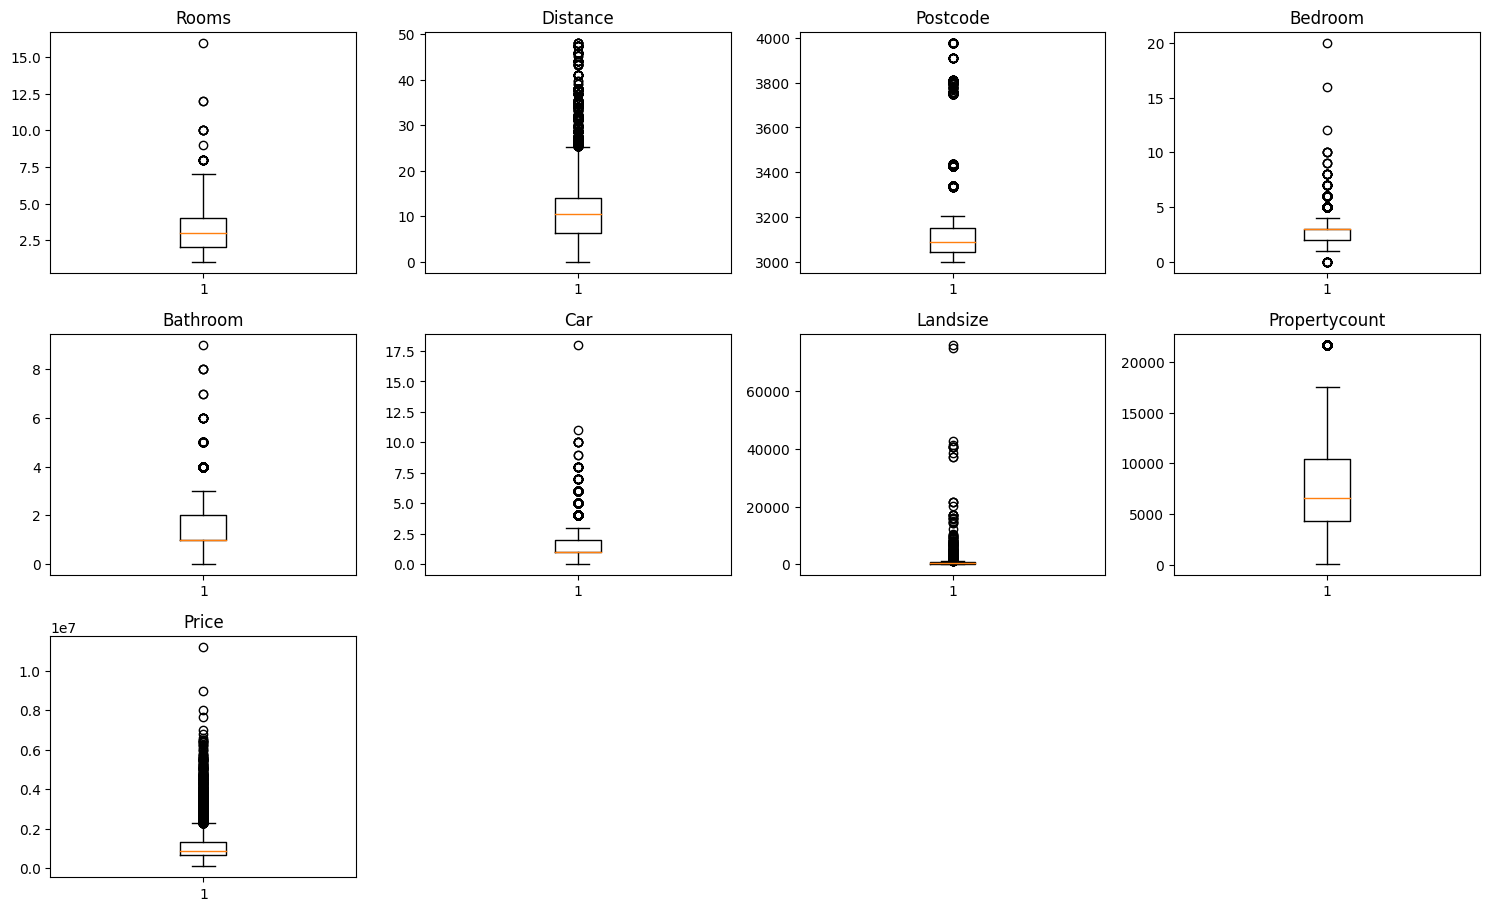

In [115]:
numeric_columns = ['Rooms','Distance','Postcode','Bedroom','Bathroom','Car','Landsize','Propertycount','Price']
plt.figure(figsize = (15,12))

for i, variable in enumerate(numeric_columns):
  plt.subplot(4,4, i+1)
  plt.boxplot(data[variable], whis = 1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()


In [116]:
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)

IQR = Q3-Q1
lower_whisker = Q1 - 1.5*IQR
upper_whisker = Q1 + 1.5*IQR

#Percentage of outliers in each column
((data[numeric_columns]< lower_whisker) | (data[numeric_columns]> upper_whisker)).sum()/data.shape[0]*100

Rooms            0.660
Distance        13.763
Postcode         3.889
Bedroom         21.677
Bathroom         6.527
Car              8.844
Landsize         5.457
Propertycount   11.704
Price           13.501
dtype: float64

In [117]:
def treat_outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3-Q1

  lower_whisker = Q1 - 1.5*IQR
  upper_whisker = Q1 + 1.5*IQR

  df[col] = np.clip(df[col], lower_whisker, upper_whisker) #Using numpy function clip() to truncate the column values to whisker levels
  return df

In [118]:
data=treat_outliers(data, 'Rooms')

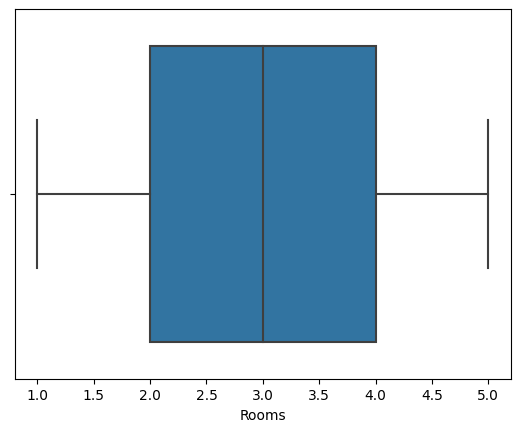

In [119]:
sns.boxplot(data = data, x = 'Rooms');

In [123]:
data=treat_outliers(data, 'Bedroom')
data=treat_outliers(data, 'Car')
data=treat_outliers(data, 'Landsize')
data=treat_outliers(data, 'Bathroom')

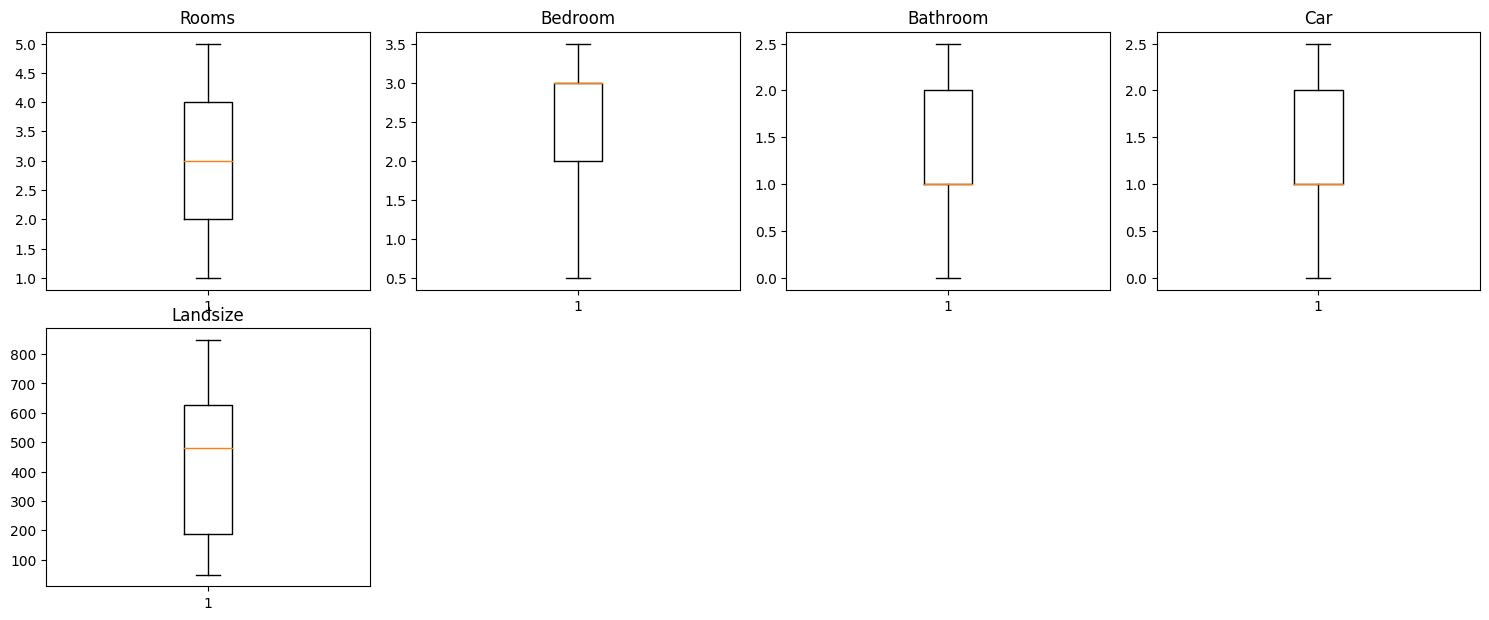

In [125]:
numeric_columns = ['Rooms','Bedroom','Bathroom','Car','Landsize']
plt.figure(figsize = (15,12))

for i, variable in enumerate(numeric_columns):
  plt.subplot(4,4, i+1)
  plt.boxplot(data[variable], whis = 1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()